### Analysis the company employee's data  to understand what features lead to an employee leaving the company and predicting the churn employee and the churning rate using Logistic Regression and Random Forest.

It is important to understand or predict the churning rate or to predict how likely an employee is to leave the company. It allows the company to focus on employee retention process rather than hiring new employee. Hiring new employee is often costly as comparing to retaining the existing employee due to factor like interview process, joining bonus, initial training process etc.   

Understanding who is likely to leave the company and the reason behind leaving can help company to improve employee retention as well as looking for advance hiring. 

In [2]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the employee churn data

In [3]:
## Importing the dataset
echrun_file = "https://raw.githubusercontent.com/aj-amitjain/Data_Science/master/dataset/employee_churn_data.csv"
echrun = pd.read_csv(echrun_file)

#### Understanding the data

In [4]:
## Displaying the top rows in employee churn dataframe
echrun.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [5]:
## Checking out the shape of data
echrun.shape       

(14999, 9)

The dataframe contain around 15k employee's details with 8 features and a traget variable (left) stating whether a employee left the company or not. 

Feature include details like number of project, average monthly working hours, time in company, promotion in last 5 years, department, salary and if a person have meet with any accident during work.

In [6]:
## Checking out the types of variables
echrun.dtypes 

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

There are two catergorical variables and other's are of numerical type 

In [7]:
## Checking for any missing value
echrun.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no null value for any features

In [34]:
## Creating a index of categorical variable
categorical_variables =  echrun.select_dtypes(exclude=['int64']).columns
categorical_variables

Index(['department', 'salary'], dtype='object')

#### Reading the employee satfication data 

In [10]:
## Importing another dataset 'Employee Satisfaction Evaluation'
ese_file = 'https://raw.githubusercontent.com/aj-amitjain/Data_Science/master/dataset/employee_satisfaction_evaluation.xlsx'
ese  = pd.read_excel(ese_file)

In [11]:
## Displaying the top rows in employee statification dataframe
ese.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


Employee statification dataframe contain feature statification level of an employee and their last evaluation rating

In [125]:
## Checking out the shape of data
ese.shape

(14999, 3)

In [154]:
## Merging Employee Churn dataset with Employee Satisfaction Evaluation dataset

## Matching the index for both dataset
ese = ese.rename(columns= {'EMPLOYEE #' : 'employee_id'})
df = pd.merge(echrun, ese, on='employee_id')

#### Analysis

In [129]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [130]:
## Verify the shape of new dataset
df.shape

(14999, 11)

Final dataset contain around 15k employees detail and 10 independent variable and a traget variable. 

In [131]:
## Checking the number of employee who left and who stayed.
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Data is imbalance as the number of active employee is higher as compared to those who left.

In [132]:
## Verifying if there is any column with NA 
df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [133]:
df.dtypes

employee_id                int64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
satisfaction_level       float64
last_evaluation          float64
dtype: object

There are few NA values for statification level and last evaluation

#### Imputing the missing value with its mean value

In [134]:
## Replacing NA's with mean values
df.fillna(df.mean(), inplace=True)

In [135]:
## Verifying if there is any column with NA 
df.isnull().any(axis=0)

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level       False
last_evaluation          False
dtype: bool

In [157]:
## Changing the type of employee id to object 
df.set_index('employee_id')

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,1,0,support,low,0.40,0.57
87673,2,160,3,0,1,0,support,low,0.37,0.48
87679,2,143,3,0,1,0,support,low,0.37,0.53


In [137]:
## Creating the correlation matrix
cor_mat = df.corr()

<AxesSubplot:>

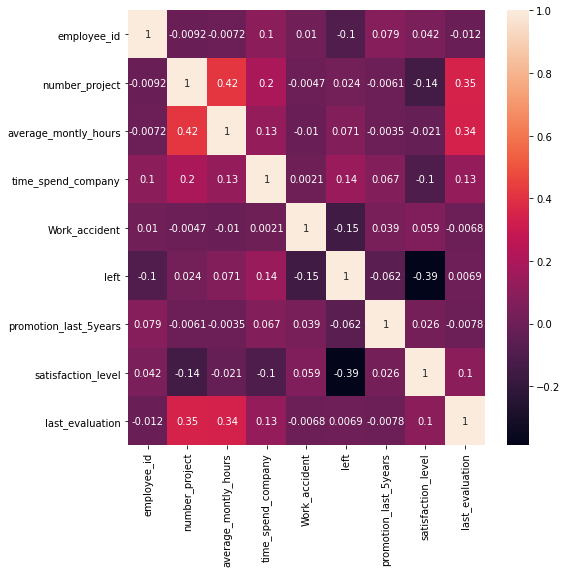

In [139]:
#corr_mat = df.drop(columns=list(categorical_variables.values))
plt.figure(figsize=(8,8))
sns.heatmap(cor_mat, annot=True)

#### Observation from above plot
1. There is a negative correlation between satisfication level and employee who left which is very obvious. Similar is the case with work accident and promotion but is not significant. 
2. Number of project is slightly correlated with average monthly working hour and both is related to evaluation.
3. Other feature doesn't seems to have any major impact on employee leaving the company

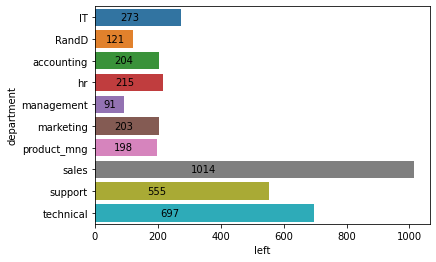

In [112]:
## Department-wise, count of employees who left
dept_wise = df.groupby('department').sum()
dept_wise.reset_index(inplace=True)
bplot = sns.barplot(y='department', x='left', data=dept_wise, orient='h', )

## Adding annotation to the bars
for p in bplot.patches:
        count = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width()*0.3
        y = p.get_y() + p.get_height()/1.5
        bplot.annotate(count, (x, y))

#### Observation from above plot

1. Most number of employee to leave the company are mostly from sales, support or technical department, sales being at top. 
2. Though we can't conclude about the department with higher percentage of employee leaving the company from above graph as sale have high numbers of employee, so the number of employee to leave the company is also higher. 
3. Managment is with lowest number of employee leaving the company, reason can be good salary and post. 
4. To understand the percentage of employee for different department we can make a plot with percentage rather the count of the employees. 

In [113]:
employee_count = pd.DataFrame(df['department'].value_counts())
employee_count.reset_index(inplace=True)
employee_count.columns = ['department', 'total']

In [114]:
dept_wise_p = pd.merge(dept_wise, employee_count, on='department')
dept_wise_p['percentage'] = dept_wise_p['left']/dept_wise_p['total']
dept_wise_p.head()

,department,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,total,percentage
0,IT,4683,248119,4256,164,273,3,758.17283,879.452250,1227,0.222494
1,RandD,3033,158030,2650,134,121,27,487.80000,560.446125,787,0.153748
2,accounting,2934,154292,2702,96,204,14,446.68283,550.706125,767,0.265971
3,hr,2701,146828,2480,89,215,15,442.53566,524.006125,739,0.290934
4,management,2432,126787,2711,103,91,69,391.76566,456.234499,630,0.144444


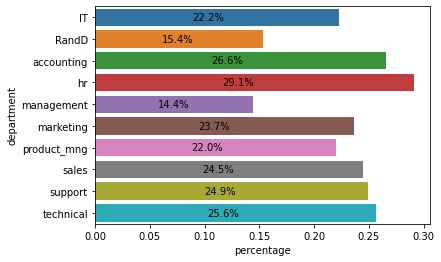

In [140]:
## Ploting the bar graph, percentage of employee 
## from different department who leaves the company.
bplot_p = sns.barplot(x='percentage', y='department', data=dept_wise_p)

for p in bplot_p.patches:
    per = '{:.1f}%'.format(100 * p.get_width())
    x = p.get_x() + p.get_width() * 0.4
    y = p.get_y() + p.get_height()/1.5
    bplot_p.annotate(per, (x,y))

#### Observation from above plot

1. From above plot we can see that employee from the HR & Accounting department have higher ratio of employee leaving the company. 
2. And it is lowest for Management and RandD department. 

#### Feature Engineering

In [141]:
## Creating dummy variables for categorical variable, drop_first = true to avoid dummy variable trap
df = pd.get_dummies(data=df, columns=categorical_variables, drop_first=True)
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,1003,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,1005,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,1486,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,1038,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,1057,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [142]:
## Creating explanatory and response variables
X = df.drop(columns=['left']).values
y = df.left.values

In [143]:
## Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [144]:
## Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Modelling & Evaluation

In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [146]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

y_pred = classifier_lr.predict(X_test)

print('Accuracy score for logistic regression model: {:.2f}%'.format(accuracy_score(y_pred, y_test) * 100))
print('Confusion matrix for logistic regression model:')
print(confusion_matrix(y_test, y_pred))
print('Churn Rate : {:.2f}%'.format((y_pred == 1).sum()/len(y_pred)*100))

Accuracy score for logistic regression model: 79.57%
Confusion matrix for logistic regression model:
[[2133  166]
 [ 447  254]]
Churn Rate : 14.00%


In [147]:
## Creating a model
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

y_pred = classifier_rf.predict(X_test)

print('Accuracy score for random forest: {:.3f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Confusion matrix for random forest:')
print(confusion_matrix(y_test, y_pred))
print('Churn Rate : {:.2f}%'.format((y_pred == 1).sum()/len(y_pred)*100))

Accuracy score for random forest: 98.233%
Confusion matrix for random forest:
[[2287   12]
 [  41  660]]
Churn Rate : 22.40%


* While logisitc regression show lower churning rate its have low accuracy of 79%. 
* Random forest on other hand have higher churning rate with accuracy score of 98% 

We can use the following model to find the list of employee those are likely to leave the company and focus on retaining them. As per the above model 41 employee how are still with the company but are predicted as left, so company should foucs on retaining them. 